Daten importieren aus Datei
------

In [1]:
import pandas as pd

attribute_names = ['Sequence_Name','mcg','gvh','alm','mit','erl','pox','vac','nuc','Class']

data = pd.read_csv('Documents/2 - Entwicklung/5 - Data Science/Digethic/DS Session 4/yeast.data', delim_whitespace=True, names=attribute_names)

In [2]:
data

,Sequence_Name,mcg,gvh,alm,mit,erl,pox,vac,nuc,Class
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...,...
1479,YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


Train und Test Datensätze erstellen, normalisieren
---------

In [3]:
X = data.iloc[:,1:9]
y = data["Class"]
y = y == 'EXC'

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [4]:
y

0       False
1       False
2       False
3       False
4       False
        ...  
1479    False
1480    False
1481    False
1482    False
1483    False
Name: Class, Length: 1484, dtype: bool

In [5]:
#Normalisieren der Daten
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

kNN-Classifier
---------------

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knnclf = KNeighborsClassifier(n_neighbors=36)
knnclf.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=36)

Akkuranz bestimmen
----------------

In [35]:
#Array für alle Ergebnisse
ergebnis = []

score = knnclf.score(X_test,y_test)
print('knn-Classifier scores with {}% accuracy'.format(score*100))
ergebnis.append(['knn-classifier', score])

knn-Classifier scores with 94.61279461279462% accuracy


Optimalen k-wert bestimmen
---------------

In [18]:
import matplotlib.pyplot as plt
import numpy as np
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_norm, y_train)
    pred_i = knn.predict(X_test_norm)
    #error.append(np.mean(pred_i != y_test))
    error.append(knn.score(X_test,y_test)*100)

Text(0, 0.5, 'Akkuranz')

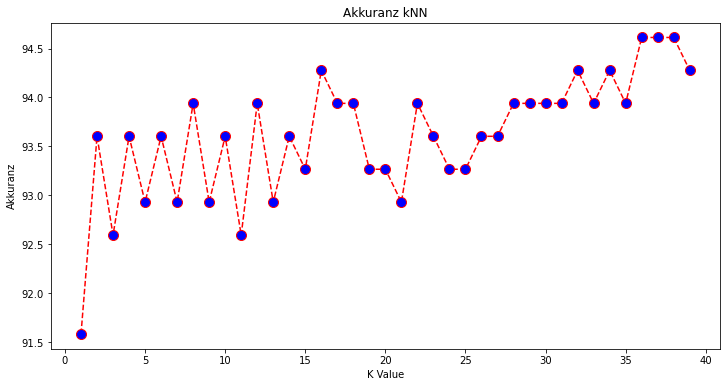

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Akkuranz kNN')
plt.xlabel('K Value')
plt.ylabel('Akkuranz')

Decision Tree
----------

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=8, criterion="entropy", min_samples_split=9)
dt.fit(X_train_norm,y_train)
from sklearn.tree import DecisionTreeClassifier

score = dt.score(X_test_norm,y_test)
print('Decision Tree scores with {}% accuracy'.format(score*100))
ergebnis.append(['decision tree', score])

Decision Tree scores with 98.31649831649831% accuracy


In [21]:
from sklearn.model_selection import GridSearchCV

#tree parameters which shall be tested
tree_para = {'criterion':['gini','entropy'],'max_depth':[i for i in range(1,20)], 'min_samples_split':[i for i in range (2,20)]}

#GridSearchCV object
grd_clf = GridSearchCV(dt, tree_para, cv=5)

#creates differnt trees with all the differnet parameters out of our data
grd_clf.fit(X_train, y_train)

#best paramters that were found
best_parameters = grd_clf.best_params_  
print(best_parameters) 

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 9}


Random Forest
-------------

In [37]:
from sklearn.ensemble import RandomForestClassifier

#rf = RandomForestClassifier(max_depth=8, criterion="entropy", min_samples_split=9)
rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train_norm,y_train)

RandomForestClassifier()

In [38]:
score = rf.score(X_test_norm,y_test)

print('Random Forest scores with {}% accuracy'.format(score*100))
ergebnis.append(['random forest', score])

Random Forest scores with 97.97979797979798% accuracy


Support Vector Machine
-------------

In [39]:
from sklearn.svm import SVC

sv = SVC(kernel = 'poly')
sv.fit(X_train_norm, y_train)

SVC(kernel='poly')

In [40]:
score = sv.score(X_test_norm,y_test)

print('Support Vector Machine scores with {}% accuracy'.format(score*100))
ergebnis.append(['support vector machine', score])

Support Vector Machine scores with 96.96969696969697% accuracy


Ergebnisse vergleichen
-----

In [41]:
ergebnis

[['knn-classifier', 0.9461279461279462],
 ['decision tree', 0.9831649831649831],
 ['random forest', 0.9797979797979798],
 ['support vector machine', 0.9696969696969697]]

ROC Graphs
----------

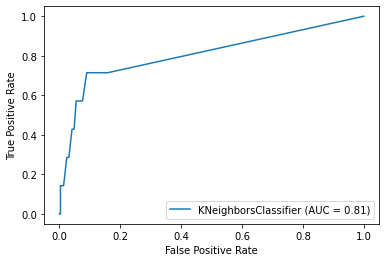

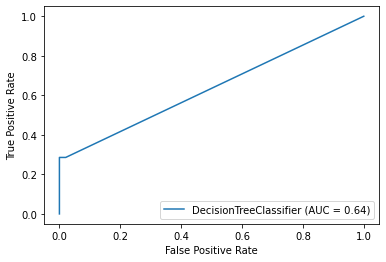

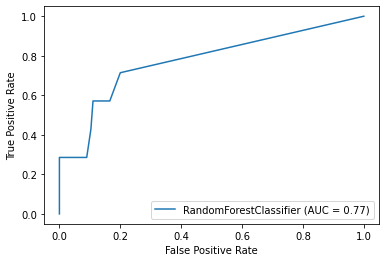

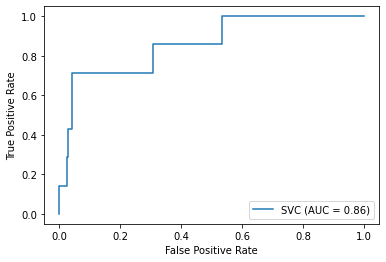

In [42]:
from sklearn import metrics

metrics.plot_roc_curve(knnclf, X_test_norm, y_test) 
metrics.plot_roc_curve(dt, X_test_norm, y_test) 
metrics.plot_roc_curve(rf, X_test_norm, y_test) 
metrics.plot_roc_curve(sv, X_test_norm, y_test) 